# Titanic Logistic Regression

In this project, I want to use logistic regression for making prediction servival and deceased people 
in titanic dataset.
I used cleande data from https://www.kaggle.com/c/titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explorotory data analysis

In [4]:
#using seaborn to create simple heatmap to see where is most of our missing data
train.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

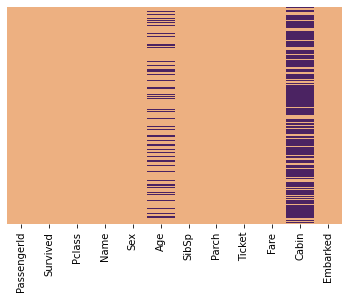

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='flare')

In [6]:
#Do some explority data analysis at a visiual level.
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

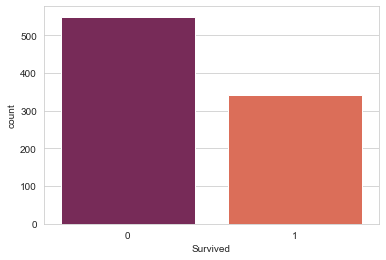

In [7]:
sns.countplot(x='Survived',data=train, palette='rocket')

lookliked around 5500 passangers did not survived.However around 350 passangers survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

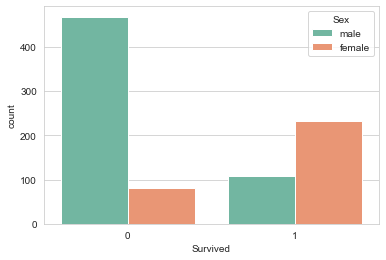

In [8]:
#Create a countplot based on the Sex hue.
sns.countplot(x='Survived',data=train,hue='Sex',palette='Set2')

It is clear that based on this countplot most of the passangers who did not survived are man 
and most of the passangers who survived are female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

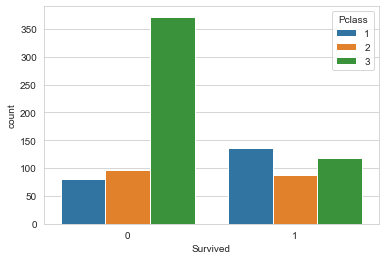

In [9]:
#Create a contplot based on the passanger class hue
sns.countplot(x='Survived',data=train,hue='Pclass')

Based on this countplot it is clear that most of the passangers who did not survived are belong to the 
3rd class which is the cheapest class and most of the passangers who survived are belong to the 1st class 
which is the most expensive class.

C:\Users\Ansari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

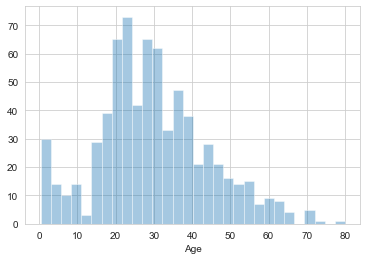

In [10]:
#Get idea about the age of the passangers in the Titanic with distplot.
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

Based on this distplot most of the passangers age was around 20 and 30 years old.

<AxesSubplot:ylabel='Frequency'>

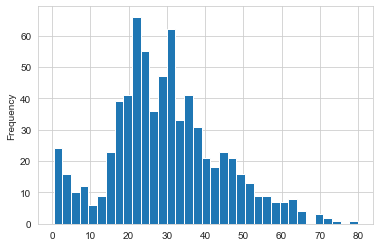

In [11]:
#Better visulization for distplot based on age
train['Age'].plot.hist(bins=35)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We explore Pclass,Sex,Age, now we want to explore SibSp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

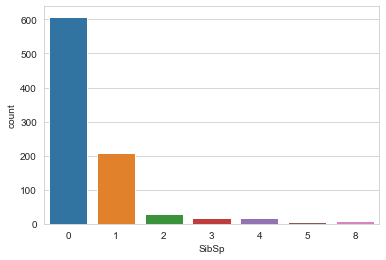

In [13]:
#Countplot based on SibSp
sns.countplot(x='SibSp',data=train)

Based on this countplot it is clear that most of the passangers did not have any childrean or spouse 
on bored.probbly most of them was man in the third class without child or supose.

<AxesSubplot:>

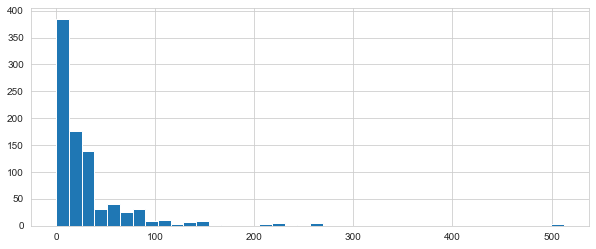

In [14]:
#Visulasing Fare column,howmuch people paied as a distribution
train['Fare'].hist(bins=40,figsize=(10,4))

Based on previous visulazition in class type and this histplot it is clear that most of the passangers 
was in third class and they paied between 0 and 50.

In [15]:
#use cufflink for better visualization for Fare column
import cufflinks as cf

In [16]:
cf.go_offline()

In [17]:
train['Fare'].iplot(kind='hist',bins=40)

After Visulazing data now I want to work on missing data, for making acceptable data that can use in 
machine learning algorithms.

# Data cleaning

In this stage I want to fill in missing data, I decided to fill based on average age off the passangers
in each class,so first I want to create boxplot for giving data and then use this data for fill in the 
age columns.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

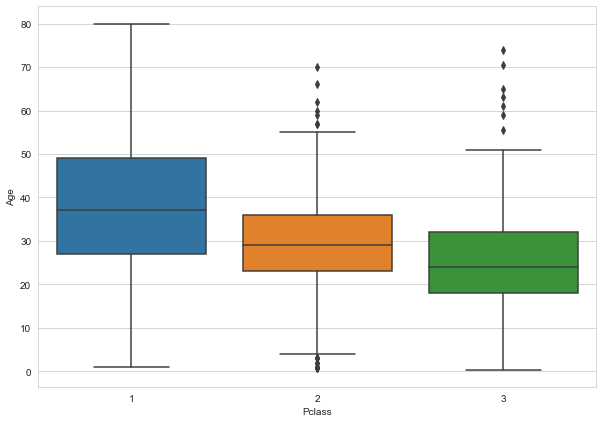

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        if Pclass==2:
            return 28
        else:
            return 23
    else:
        return Age
            
        

In [20]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

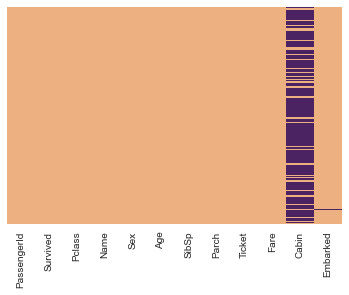

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='flare')

In [22]:
#Since there are many missing information in Cabin the best option is dropping this data.
train.drop('Cabin',axis=1,inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train.dropna(inplace=True)

Now we solved the problem of missing data and we are good to go for machine learning model.

Now we need to deal with Categorical features and convert it to dummy variable using pandas.

In [26]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [27]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [28]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
train=pd.concat([train,sex,embarked],axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Now I want to dropp some colomns that are not use for machine learning

In [31]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Buildin a logistic Regression model:

In [42]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel=LogisticRegression()

In [47]:
logmodel.fit(X_train,y_train)

C:\Users\Ansari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [51]:
predictions=logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

